In [1]:
import pandas as pd
import numpy as np

In [6]:
## Load the dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist

X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

In [7]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X.head()
# here it contains 784 columns, this is because each image is 28x28 pixels and each feature simply represents one pixel's intensity, from 0(white) to 255(black).


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


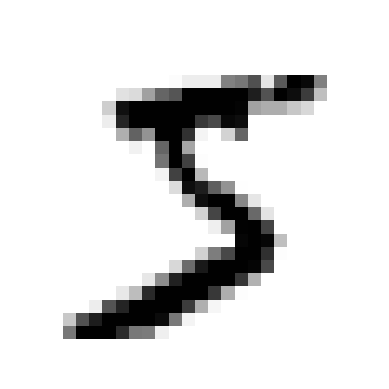

In [13]:
## now let's peak one of the digit from the dataset.
## All we need do is grab an instance's feature vector, reshape it to a 28x28 array, and display it using matplotlib's imshow() function
import matplotlib.pyplot as plt
import matplotlib

some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [15]:
y[0]

'5'

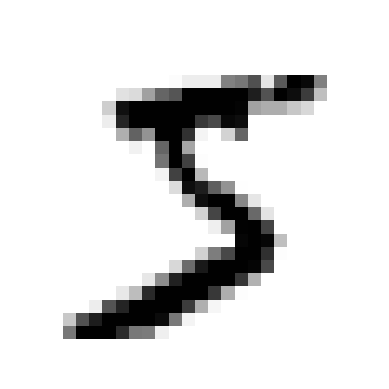

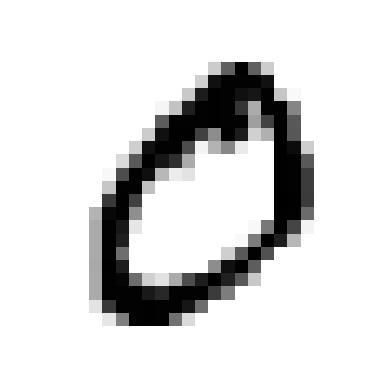

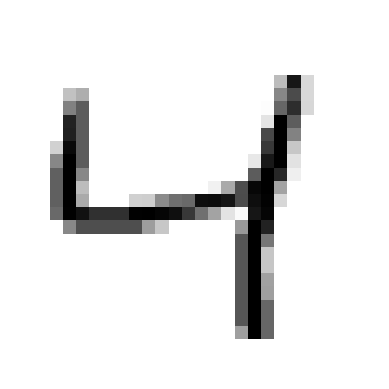

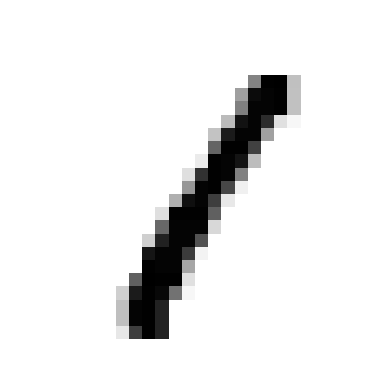

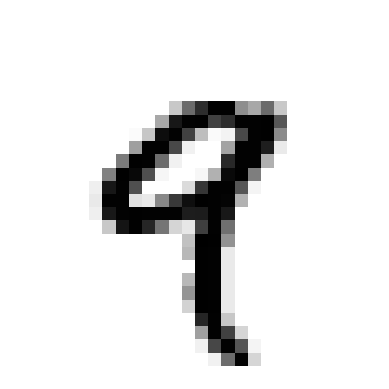

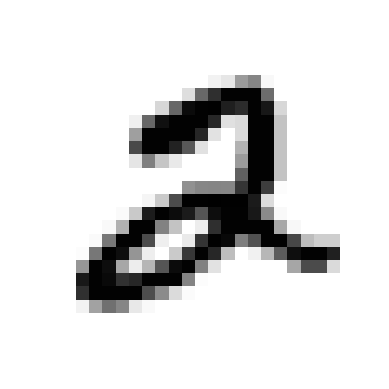

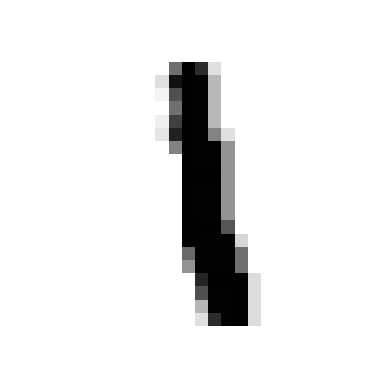

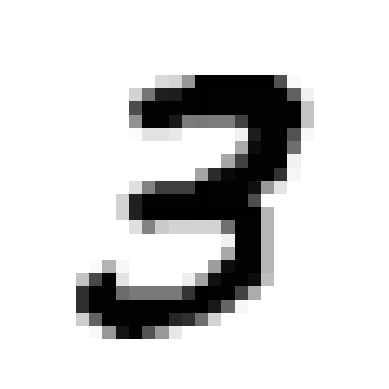

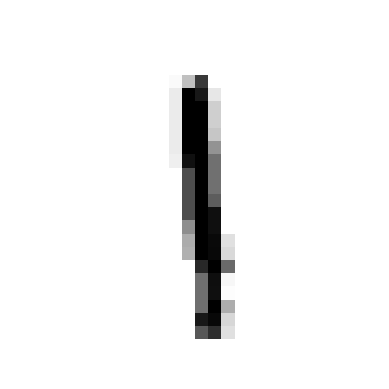

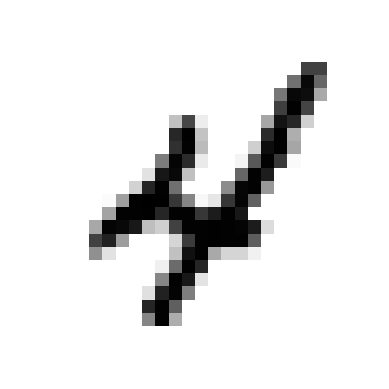

In [19]:
# Display the top 10 images of handwritten digits
for i in range(10):
    some_digit = X.iloc[i]
    some_digit_image = some_digit.values.reshape(28, 28)
    plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.show()

In [20]:
## let's set aside the test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [23]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]


## 2. Training a Binary Classifier

> Let's simplify the problem for now and only try to identify one digit. eg: the number 5, this "5-detector" will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5.

In [24]:
y_train_5 = (y_train==5) # true only for 5 
y_test_5 = (y_test==5)
y_test_5

60000    False
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 10000, dtype: bool